In [106]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [107]:
# Load the dataset
tele_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [108]:
tele_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [109]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [110]:
# Check for missing values
tele_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [111]:
# Impute missing values in numerical features using SimpleImputer with 'mean' strategy
num_cols = tele_df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='most_frequent')
X_num = tele_df[num_cols]
X_num_imputed = imputer.fit_transform(X_num)
X_num_imputed = pd.DataFrame(X_num_imputed, columns=num_cols)

In [112]:
# Impute missing values in categorical features using SimpleImputer with 'most_frequent' strategy
cat_cols = tele_df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat = tele_df[cat_cols]
X_cat_imputed = cat_imputer.fit_transform(X_cat)
X_cat_imputed = pd.DataFrame(X_cat_imputed, columns=cat_cols)

In [113]:
# Update the original DataFrame with the imputed data
tele_df[num_cols] = X_num_imputed
tele_df[cat_cols] = X_cat_imputed

In [114]:
tele_df.duplicated().sum()

0

In [115]:
tele_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

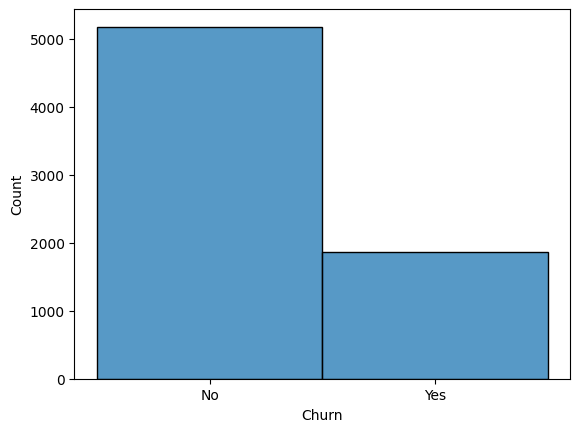

In [116]:
sns.histplot(tele_df['Churn'])
plt.show()

In [117]:
tele_df['Churn'] = tele_df['Churn'].map({'Yes': 1, 'No': 0})

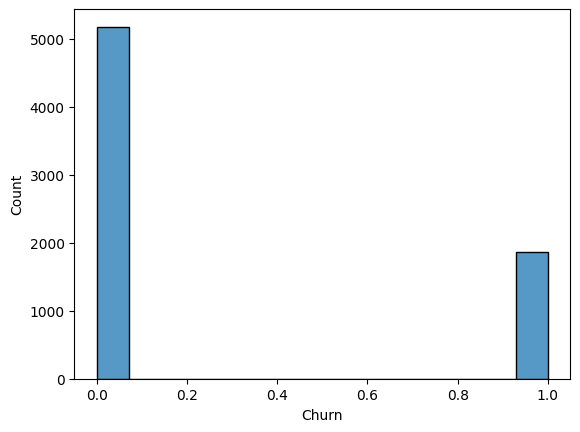

In [118]:
sns.histplot(tele_df['Churn'])
plt.show()

In [119]:
tele_df['Churn'].isnull().sum() # Check for missing values
tele_df['Churn'].fillna(0, inplace=True)  # Fill missing values with 0 (or another appropriate value)

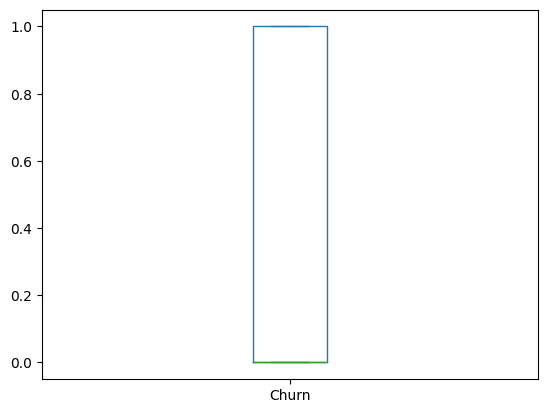

In [120]:
tele_df['Churn'].plot(kind='box') #to check for outliers
plt.show()

In [121]:
# Turn categorical values to numerical using label encoding
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [122]:
tele_col = tele_df.select_dtypes(include=['object']).columns
tele_col

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [123]:
for col in tele_col: # Convert Categorical Data to Numerical
    tele_df[col] = label.fit_transform(tele_df[col])


In [124]:
# Select your target variable and features
features = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',]

X = tele_df[features].values
y = tele_df['Churn'].values

In [125]:
# Standardize data to avoid high variations in the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.91189045, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.21690598,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [-0.47070074,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-0.07574495, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 1.18683477,  0.99053183,  2.27315869, ...,  1.33486261,
         0.32033821, -0.31653445],
       [-0.63694614,  0.99053183, -0.43991649, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [126]:
#import necessary packages
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [127]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
#using SMOTE to deal with imbalance data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [129]:
# Update the original DataFrame with the imputed data
X_train_oversampled = X_train
y_train_oversampled = y_train

In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [134]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n',class_report)

Accuracy: 0.8147622427253371
Confusion Matrix:
 [[940  96]
 [165 208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [132]:
!pip install pypickle

In [135]:
import pypickle
filepath = 'tele.pkl'
pypickle.save(filepath, model)

[pypickle] Pickle file saved: [tele.pkl]


True